# City of Boston Payroll Analysis
Salary data is available for City of Boston employees from at least 2011 to 2016.  Roughly 20,000 employees and salaries are classified by department, job title, “regular” or “overtime”, zip code and a few other criteria.

In [72]:
# import modules
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [126]:
# read and convert numerical entries to numbers
earnings = pd.read_csv('C:/Users/rujjn/Springboard_DataScience/employee-earnings-report-2016.csv', \
                       encoding = "ISO-8859-1", header=0, dtype={'Zip Code': 'category'})
c = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN/EDUCATION INCENTIVE', 'TOTAL EARNINGS']
earnings[c] = earnings[c].replace({'\$': '', ',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

## Data Cleaning
The file contains 22046 entries, a complete set of names/employees and total earnings. One zip code is missing. There are 1448 unique job titles - a plausible number. Interestingly there are 228 unique department names. According to the city's website, there are actually only 72 departments. This suggests some data cleaning might be necessary.

In [99]:
print(earnings.info())
print('Number of job titles:', len(earnings.TITLE.unique()))
print('Number of departments:', len(earnings.DEPARTMENT_NAME.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22046 entries, 0 to 22045
Data columns (total 12 columns):
NAME                         22046 non-null object
DEPARTMENT_NAME              22046 non-null object
TITLE                        22046 non-null object
REGULAR                      21463 non-null float64
RETRO                        416 non-null float64
OTHER                        12845 non-null float64
OVERTIME                     6690 non-null float64
INJURED                      1378 non-null float64
DETAIL                       2425 non-null float64
QUINN/EDUCATION INCENTIVE    1290 non-null float64
TOTAL EARNINGS               22046 non-null float64
POSTAL                       22045 non-null object
dtypes: float64(8), object(4)
memory usage: 2.0+ MB
None
Number of job titles: 1448
Number of departments: 228


A closer look at the job titles shows some data cleaning might be helpful as well:

In [100]:
police_titles = earnings['TITLE'].loc[(earnings['DEPARTMENT_NAME'] == 'Boston Police Department') & \
                                      (earnings['TITLE'].str.startswith('Police Off'))]
police_department = earnings['TITLE'].loc[(earnings['DEPARTMENT_NAME'] == 'Boston Police Department')]
print('Number of unique job titles in police department', len(set(police_department)))
print(police_titles.value_counts())

Number of unique job titles in police department 178
Police Officer                    1279
Police Offc Comm Serv Offc 3$8      52
Police Offc Mobile Offc 2$6         47
Police Offc Acad Instr 2$6          28
Police Offc/FgrPrt Ev Tch 4$10      23
Police Offc/Juvenile Offc 4$10      18
Police Offc Canine 2$6              18
Police Officer Hdq Dispatch         14
Police Offc Harborboat 3$8          13
Police Offc Hackney Invest 3$8      13
Police Offc/Auto Invest 4$10        10
Police Offc Canine Offc 2$6         10
Police Offc/Bomb Squad               9
Police Offc Bomb Squad               6
Police Offc Ballistician 4$10        6
Police Offc/Hosp Liaison 4$10        5
Police Officer Harborboat 3$8        4
Police Officer Mobile Oper 2$6       2
Police Offc Breath $13.50            1
Name: TITLE, dtype: int64


Note: $ symbols are possible errors in the dataset, but don't seem to affect the other columns.

In [208]:
bps = earnings['TITLE'].loc[(earnings['DEPARTMENT_NAME'].str.startswith('BPS'))]
# bps.value_counts()

Median total earnings by department:

In [210]:
salary = earnings.groupby(['TITLE'])['TOTAL EARNINGS'].agg(np.median)
# too many to list

"Cab Monitors" (=bus monitors) earn at least \$21.73 per trip in 2018. How does someone earn only $2.14?

In [80]:
cab = earnings.loc[(earnings['TITLE'] == 'Cab Monitor')]
# salary = cab.loc[(cab['TOTAL EARNINGS'] == min(cab['TOTAL EARNINGS']))]
cab = cab.sort_values(by='TOTAL EARNINGS')
print(cab['TOTAL EARNINGS'][:10])

9849     2.14
1986     2.50
13853    3.85
2346     4.38
4942     6.48
16437    6.53
20862    7.58
21887    8.05
10289    8.45
2993     8.82
Name: TOTAL EARNINGS, dtype: float64


In [84]:
earnings.iloc[9849]

NAME                          Jameau,Bernadette
DEPARTMENT_NAME              BPS Transportation
TITLE                               Cab Monitor
REGULAR                                    2.14
RETRO                                       NaN
OTHER                                       NaN
OVERTIME                                    NaN
INJURED                                     NaN
DETAIL                                      NaN
QUINN/EDUCATION INCENTIVE                   NaN
TOTAL EARNINGS                             2.14
POSTAL                                    02124
Name: 9849, dtype: object

## Residency Requirement
Boston city employees are required to live within city limits. The law is not strictly enforced and is confounded by state, federal and union regulations. 

https://www.boston.gov/departments/human-resources/residency-requirements-city-workers

https://www.bostonglobe.com/metro/2016/01/13/mayor-walsh-seeks-strengthen-boston-residency-requirement-with-caveat/ZyG8xmkOsu0dMHgITSUOKN/story.html

What does the distribution look like in 2016?

69 % of city employees live in Boston.


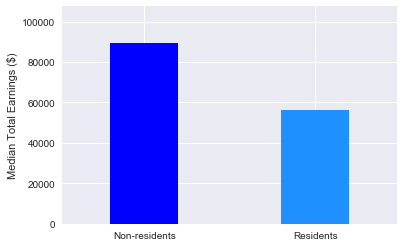

In [223]:
# Read in Boston zipcode list
boston_zips = pd.read_csv('boston-zipcodes.csv', names=['Bzips'], header=None)
boston_zips = boston_zips.astype(str).apply(lambda x: '0' + x) # treat zipcodes as strings and add leading "0"

# define resident and non-resident employees
inzips = earnings.loc[(earnings.POSTAL.isin(boston_zips.Bzips))]
outzips = earnings.loc[(~earnings.POSTAL.isin(boston_zips.Bzips))]
residents = inzips.shape[0] / zips.shape[0] * 100
print(int(residents), '% of city employees live in Boston.')

# income distribution
in_earnings = inzips['TOTAL EARNINGS'].agg(np.median)
out_earnings = outzips['TOTAL EARNINGS'].agg(np.median)
_ = plt.bar(['Residents', 'Non-residents'],[in_earnings, out_earnings], 0.4, color=['dodgerblue', 'b'])
_ = plt.ylabel('Median Total Earnings ($)')
plt.margins(0.2)
plt.show()

Note: How can I reverse the order of the bars?